%pip install -r ../requirements.txt

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

In [2]:
tf.random.set_seed(42)

In [3]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available: 0


In [4]:
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
tf.debugging.set_log_device_placement(True)

In [5]:
def get_data():
    # TODO: CRIAR A FUNÇÃO QUE BAIXA OS DADOS DO WANDB
    data = pd.read_csv('../data/preprocessed/balanced.csv')
    return data

In [6]:
def vectorize_data(data):
    vectorizer = TfidfVectorizer(max_features=5000)
    X_tfidf = vectorizer.fit_transform(data).toarray()
    joblib.dump(vectorizer, '../models/vectorizer.pkl')
    return X_tfidf

In [7]:
def create_model():
    model = Sequential()

    model.add(Input((5000, )))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))


    model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

    return model

In [12]:
def train_model():
    df = get_data()

    X_Tfidf = vectorize_data(df['clean_text'])
    X_train, X_test, y_train, y_test = train_test_split(X_Tfidf, df['label'], test_size=0.2, random_state=42)
    model = create_model()

    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32,)

    y_pred = model.predict(X_test)
    y_pred_classes = (y_pred > 0.5).astype(int)
    cm = confusion_matrix(y_test, y_pred_classes)

    return model, cm, history

In [11]:
data = get_data()
print(data.shape)
vec = vectorize_data(data["clean_text"])
print(vec.shape)
X_train, X_test, y_train, y_test = train_test_split(vec, data['label'], test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

(38512, 4)
(38512, 5000)
X_train shape: (30809, 5000)
X_test shape: (7703, 5000)
y_train shape: (30809,)
y_test shape: (7703,)


In [13]:
model, cm, history = train_model()

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FloorMod in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op StatelessRandomGetKeyCounter in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op StatelessRandomUniformV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:loca

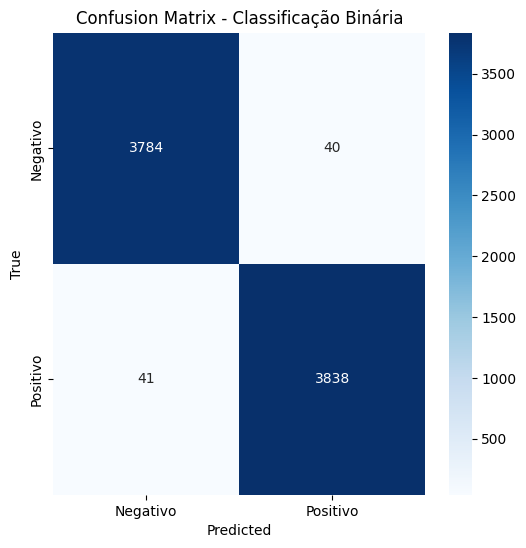

In [14]:
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negativo', 'Positivo'], yticklabels=['Negativo', 'Positivo'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Classificação Binária')
plt.show()


In [15]:
joblib.dump(model, '../models/modelv2.pkl')

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /j

['../models/modelv2.pkl']

## Weights and Biases

In [16]:
import wandb

import params

In [17]:
!wandb login

wandb: Currently logged in as: pedro_miguel (pedro_miguel-universidade-federal-do-rio-grande-do-norte). Use `wandb login --relogin` to force relogin


In [18]:
wandb.init(project=params.WANDB_PROJECT)

wandb: Currently logged in as: pedro_miguel (pedro_miguel-universidade-federal-do-rio-grande-do-norte). Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


In [19]:
plt.figure(figsize=(8, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negativo', 'Positivo'], yticklabels=['Negativo', 'Positivo'])

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

wandb.log({"Confusion Matrix": plt})

plt.close()

e:\Codes\uf\ml_ops\DetectEssay\ai-text-recognition\venv\Lib\site-packages\plotly\matplotlylib\renderer.py:571: UserWarning:

Dang! That path collection is out of this world. I totally don't know what to do with it yet! Plotly can only import path collections linked to 'data' coordinates



In [20]:
metrics = history.history

for epoch, (loss, acc, val_loss, val_acc) in enumerate(
    zip(metrics['loss'], metrics['accuracy'], metrics['val_loss'], metrics['val_accuracy'])
):
    wandb.log({
        "epoch": epoch + 1,
        "loss": loss,
        "accuracy": acc,
        "val_loss": val_loss,
        "val_accuracy": val_acc
    })


In [21]:
vectorizer_artifact = wandb.Artifact("vectorizer_model", type="model")
vectorizer_artifact.add_file("../models/vectorizer.pkl")

model_artifact = wandb.Artifact("model", type="model")
model_artifact.add_file("../models/modelv2.pkl")

ArtifactManifestEntry(path='modelv2.pkl', digest='uazYwIOZBTQGXHyd2LvJmw==', size=7861729, local_path='C:\\Users\\migue\\AppData\\Local\\wandb\\wandb\\artifacts\\staging\\tmpbs72bo0v', skip_cache=False)

In [22]:
wandb.log_artifact(vectorizer_artifact)
wandb.log_artifact(model_artifact)

<Artifact model>

In [23]:
wandb.finish()